In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("../data/house_prices.csv")

selected_columns = [
    "sqft_living",
    "bedrooms",
    "bathrooms",
    "floors",
    "view",
    "price"
]

df = df[selected_columns].copy()

X = df.drop("price", axis=1).values
y = df["price"].values

In [2]:
def train_test_split(X, y, test_size=0.2, seed=42):
    np.random.seed(seed)
    indices = np.random.permutation(len(X))
    test_count = int(len(X) * test_size)
    
    test_idx = indices[:test_count]
    train_idx = indices[test_count:]
    
    return X[train_idx], X[test_idx], y[train_idx], y[test_idx]

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [4]:
def normalize_features(X):
    mean = np.mean(X, axis=0)
    std = np.std(X, axis=0)
    return (X - mean) / std, mean, std

X_train_norm, mean, std = normalize_features(X_train)
X_test_norm = (X_test - mean) / std

In [5]:
def predict(X, W, b):
    return np.dot(X, W) + b

def mean_squared_error(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

def compute_gradients(X, y, y_pred):
    n = len(y)
    dW = (-2 / n) * np.dot(X.T, (y - y_pred))
    db = (-2 / n) * np.sum(y - y_pred)
    return dW, db

In [6]:
def gradient_descent(X, y, W, b, learning_rate=0.01, epochs=1000):
    loss_history = []
    
    for epoch in range(epochs):
        y_pred = predict(X, W, b)
        loss = mean_squared_error(y, y_pred)
        loss_history.append(loss)
        
        dW, db = compute_gradients(X, y, y_pred)
        
        W -= learning_rate * dW
        b -= learning_rate * db
        
        if epoch % 100 == 0:
            print(f"Epoch {epoch}, Loss: {loss:.4f}")
            
    return W, b, loss_history

In [7]:
n_features = X_train_norm.shape[1]

W = np.zeros(n_features)
b = 0.0

In [8]:
W, b, loss_history = gradient_descent(
    X_train_norm,
    y_train,
    W,
    b,
    learning_rate=0.01,
    epochs=1000
)

Epoch 0, Loss: 438945531125.1893
Epoch 100, Loss: 81335355303.2312
Epoch 200, Loss: 73156018667.7202
Epoch 300, Loss: 72020043558.4249
Epoch 400, Loss: 71618878830.4474
Epoch 500, Loss: 71458585946.1854
Epoch 600, Loss: 71392623378.6279
Epoch 700, Loss: 71365106459.1831
Epoch 800, Loss: 71353548578.2838
Epoch 900, Loss: 71348677267.8994


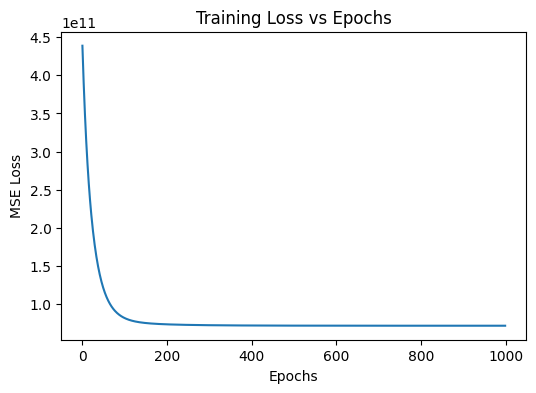

In [9]:
plt.figure(figsize=(6,4))
plt.plot(loss_history)
plt.xlabel("Epochs")
plt.ylabel("MSE Loss")
plt.title("Training Loss vs Epochs")
plt.show()

In [10]:
y_train_pred = np.dot(X_train_norm, W) + b
y_test_pred = np.dot(X_test_norm, W) + b

In [11]:
def r2_score(y_true, y_pred):
    ss_res = np.sum((y_true - y_pred) ** 2)
    ss_tot = np.sum((y_true - np.mean(y_true)) ** 2)
    return 1 - (ss_res / ss_tot)

In [12]:
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

train_r2, test_r2

(np.float64(0.49786274976359524), np.float64(0.029545729603056348))

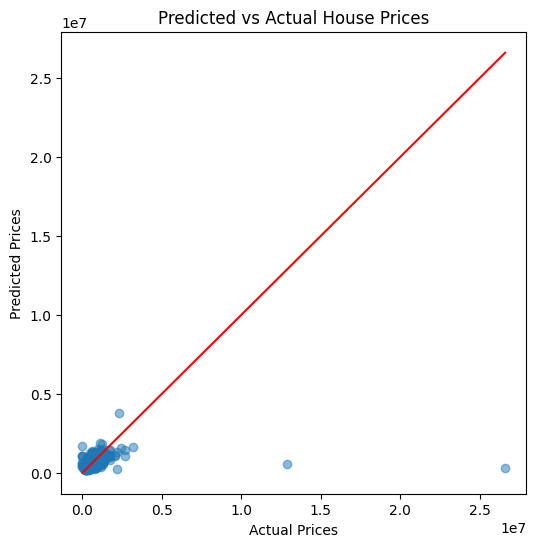

In [13]:
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_test_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         color="red")
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Predicted vs Actual House Prices")
plt.show()